In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.abs(np.sin(x/2))

plt.xlim(-7, 7)
plt.ylim(-1, 3)

x = np.arange(-2, 2, 0.01)
max_value = np.max(f(x))

box_x = np.linspace(-2.5, 2.5, 100)
box_y = np.full_like(box_x, max_value)

plt.plot(box_x, box_y, 'r--')
plt.fill_between(box_x, box_y, f(box_x), where=(box_y > f(box_x)), color='gray', alpha=0.5)
plt.plot(x, f(x))

plt.show()

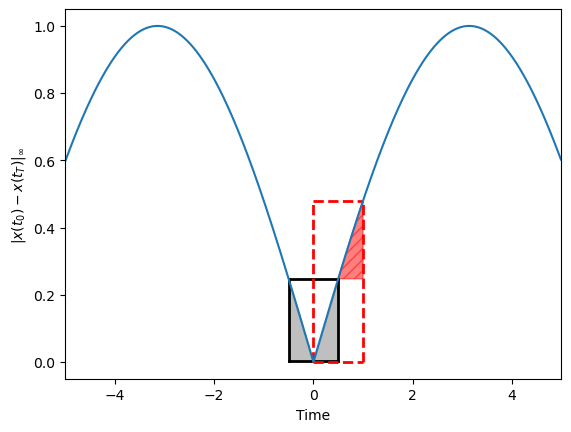

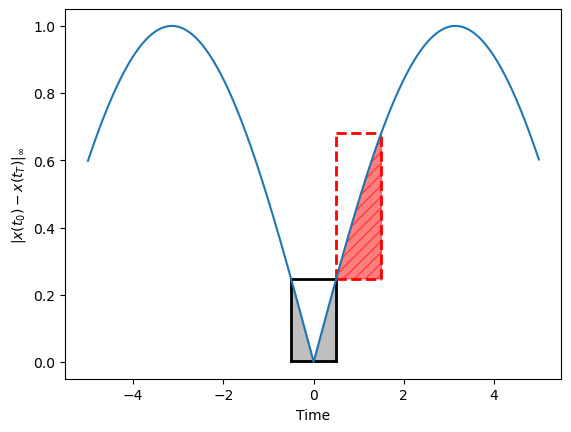

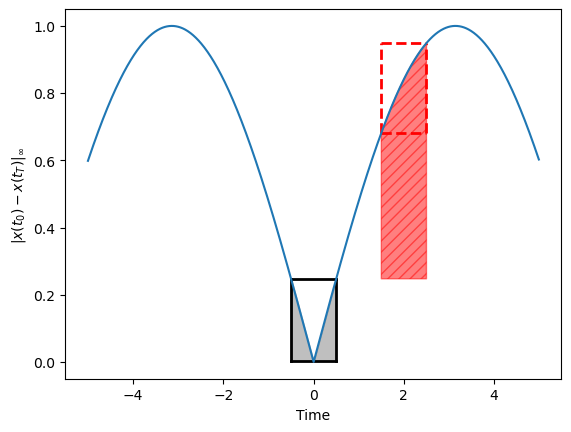

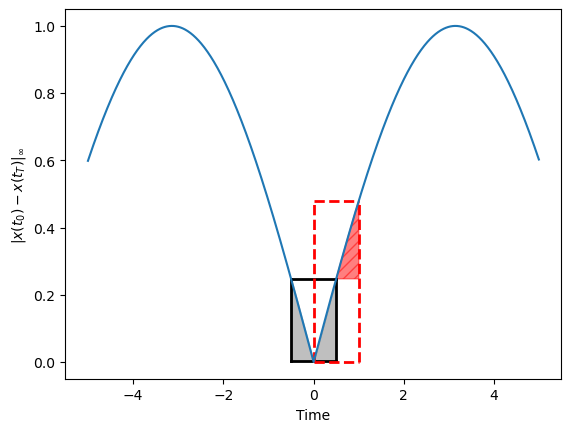

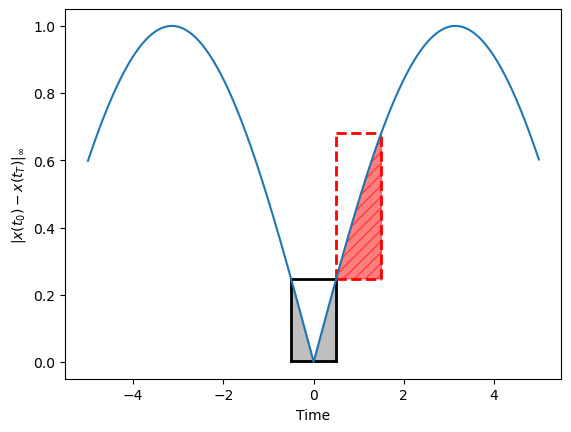

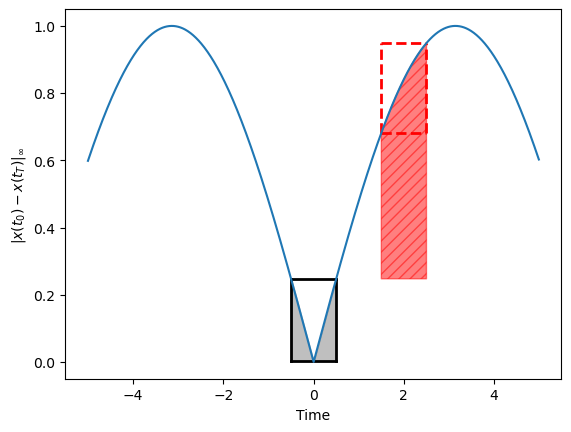

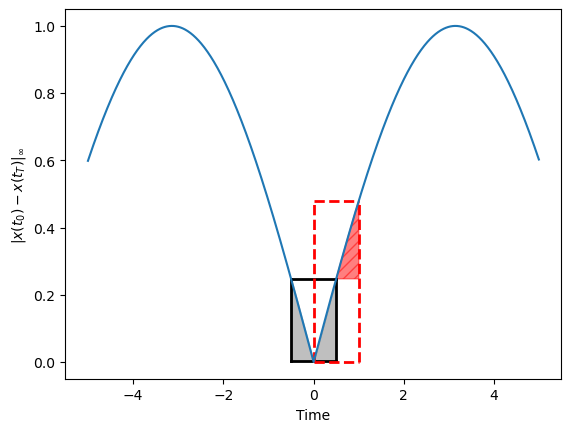

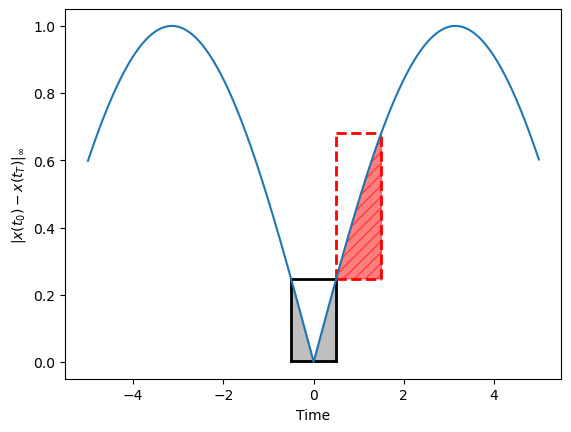

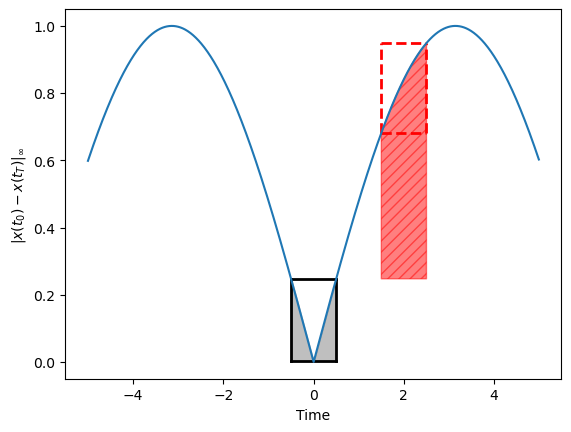

In [124]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.abs(np.sin(x/2))

plt.xlim(-5, 5)  # Adjusted x-axis limits


for input_length in [0.1, 0.5, 1]:
    for pred_horiz in [0.5 , 1, 2]:
        x = np.arange(-input_length, input_length, 0.01)

        box_x = np.linspace(-0.5, 0.5, 100)
        max_value = np.max(f(box_x))

        box_y = np.full_like(box_x, max_value)

        # Plot the rectangle
        plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'k-', linewidth=2)  # Top line
        plt.plot([box_x[0], box_x[-1]], [np.min(f(box_x)), np.min(f(box_x))], 'k-', linewidth=2)  # Bottom line
        plt.plot([box_x[0], box_x[0]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Left line
        plt.plot([box_x[-1], box_x[-1]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Right line

        # Shade the area below the curve within the box
        plt.fill_between(box_x, np.min(f(box_x)), f(box_x), where=(box_y > f(box_x)), color='gray', alpha=0.5)

        x = np.arange(-5, 5, 0.01)
    
        copy_box_x = np.array(box_x)

        ###############################


        box_x = box_x + pred_horiz
        max_value = np.max(f(box_x))

        box_y = np.full_like(box_x, max_value)

        # Plot the rectangle
        plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'r--', linewidth=2)  # Top line
        plt.plot([box_x[0], box_x[-1]], [np.min(f(box_x)), np.min(f(box_x))], 'r--', linewidth=2)  # Bottom line
        plt.plot([box_x[0], box_x[0]], [np.min(f(box_x)), max_value], 'r--', linewidth=2)  # Left line
        plt.plot([box_x[-1], box_x[-1]], [np.min(f(box_x)), max_value], 'r--', linewidth=2)  # Right line

        # Shade the area below the curve within the box
        plt.fill_between(box_x, np.max(f(copy_box_x)), f(box_x), where= ((f(box_x) > np.max(f(copy_box_x)))
                                                                 & (f(box_x) > np.max(f(copy_box_x))))
                         , color='red', alpha=0.5, hatch='///')
        
        plt.plot(x, f(x))

        plt.xlabel("Time")
        plt.ylabel(r"$|x(t_0) - x(t_T)|_\infty$")
        plt.show()


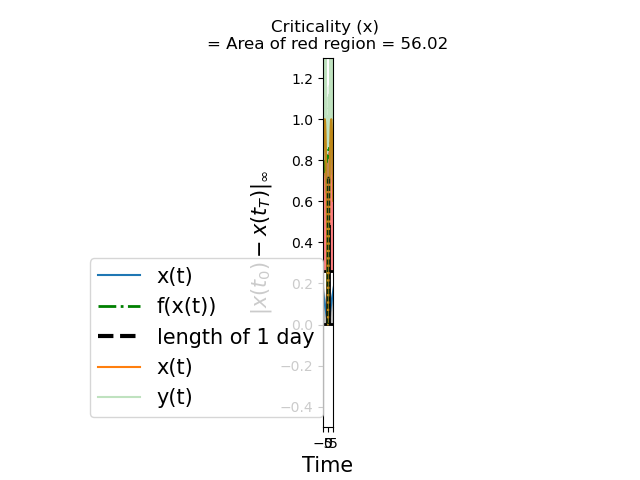

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint

def f(x):
    return np.abs(np.sin(x/2))

def f_shifted(x):
    return np.abs(np.sin(x/2)) * (1 + np.random.sample(f(x).shape) * 0.5)

plt.xlim(-5, 5)  # Adjusted x-axis limits


for input_length in [1]:
    for pred_horiz in [3]:

        box_x = np.linspace(-input_length, input_length, 100)
        max_value = np.max(f(box_x))

        box_y = np.full_like(box_x, max_value)

        # Plot the rectangle
        plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'k-', linewidth=2)  # Top line
        plt.plot([box_x[0], box_x[-1]], [np.min(f(box_x)), np.min(f(box_x))], 'k-', linewidth=2)  # Bottom line
        plt.plot([box_x[0], box_x[0]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Left line
        plt.plot([box_x[-1], box_x[-1]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Right line

        # Shade the area below the curve within the box
        plt.fill_between(box_x, np.min(f(box_x)), f(box_x), where=(box_y > f(box_x)), color='gray', alpha=0.5)

        x = np.arange(-5, 5, 0.01)
    
        copy_box_x = np.array(box_x)
        plt.plot(x, f(x), label="x(t)")


        ###############################

        box_x = np.linspace(-input_length, input_length, 100)
        f_shifted_box_x = f_shifted(box_x) 
        # sprint(f_shifted_box_x.shape)
        
        max_value = np.max(f_shifted_box_x)

        box_y = np.full_like(box_x, max_value)

        # Plot the rectangle
        plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'k--', linewidth=1)  # Top line
        plt.plot([box_x[0], box_x[-1]], [np.min(f_shifted_box_x), np.min(f_shifted_box_x)], 'k--', linewidth=1)  # Bottom line
        plt.plot([box_x[0], box_x[0]], [np.min(f_shifted_box_x), max_value], 'k--', linewidth=1)  # Left line
        plt.plot([box_x[-1], box_x[-1]], [np.min(f_shifted_box_x), max_value], 'k--', linewidth=1)  # Right line

        # Shade the area below the curve within the box
        plt.fill_between(box_x, np.max(f(box_x)), f_shifted_box_x, where= (np.max(f(box_x)) < f_shifted_box_x), color='red', alpha=0.5)

        x = np.arange(-5, 5, 0.01)
    
        plt.plot(x, f_shifted(x), label="y(t)", alpha=0.3)

        plt.xlabel("Time")
        plt.ylabel(r"$|x(t_0) - x(t_T)|_\infty$", fontsize=15)
        plt.legend(loc=4, fontsize=15)
        plt.savefig("csr_with_noise.png", dpi=600)
        plt.show()


f_shifted_box_x.shape : (100,)


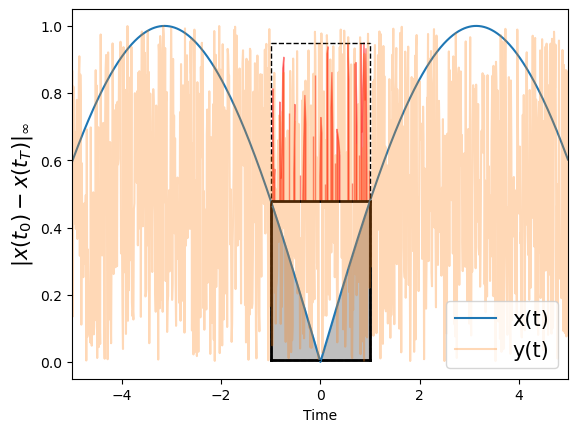

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint

def f(x):
    return np.abs(np.sin(x/2))

def f_shifted(x):
    return np.random.sample(f(x).shape) # np.abs(np.sin(x/2)) * (1 + np.random.sample(f(x).shape) * 0.5)

plt.xlim(-5, 5)  # Adjusted x-axis limits


for input_length in [1]:
    for pred_horiz in [3]:

        box_x = np.linspace(-input_length, input_length, 100)
        max_value = np.max(f(box_x))

        box_y = np.full_like(box_x, max_value)

        # Plot the rectangle
        plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'k-', linewidth=2)  # Top line
        plt.plot([box_x[0], box_x[-1]], [np.min(f(box_x)), np.min(f(box_x))], 'k-', linewidth=2)  # Bottom line
        plt.plot([box_x[0], box_x[0]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Left line
        plt.plot([box_x[-1], box_x[-1]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Right line

        # Shade the area below the curve within the box
        plt.fill_between(box_x, np.min(f(box_x)), f(box_x), where=(box_y > f(box_x)), color='gray', alpha=0.5)

        x = np.arange(-5, 5, 0.01)
    
        copy_box_x = np.array(box_x)
        plt.plot(x, f(x), label="x(t)")


        ###############################

        box_x = np.linspace(-input_length, input_length, 100)
        f_shifted_box_x = f_shifted(box_x) 
        sprint(f_shifted_box_x.shape)
        
        max_value = np.max(f_shifted_box_x)

        box_y = np.full_like(box_x, max_value)

        # Plot the rectangle
        plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'k--', linewidth=1)  # Top line
        plt.plot([box_x[0], box_x[-1]], [np.min(f_shifted_box_x), np.min(f_shifted_box_x)], 'k--', linewidth=1)  # Bottom line
        plt.plot([box_x[0], box_x[0]], [np.min(f_shifted_box_x), max_value], 'k--', linewidth=1)  # Left line
        plt.plot([box_x[-1], box_x[-1]], [np.min(f_shifted_box_x), max_value], 'k--', linewidth=1)  # Right line

        # Shade the area below the curve within the box
        plt.fill_between(box_x, np.max(f(box_x)), f_shifted_box_x, where= (np.max(f(box_x)) < f_shifted_box_x), color='red', alpha=0.5)

        x = np.arange(-5, 5, 0.01)
    
        plt.plot(x, f_shifted(x), label="y(t)", alpha=0.3)

        plt.xlabel("Time")
        plt.ylabel(r"$|x(t_0) - x(t_T)|_\infty$", fontsize=15)
        plt.legend(loc=4, fontsize=15)
        plt.savefig("garbage_model.png", dpi=600)
        plt.show()


In [33]:
f(box_x).shape

(100,)

f_shifted_box_x.shape : (100,)


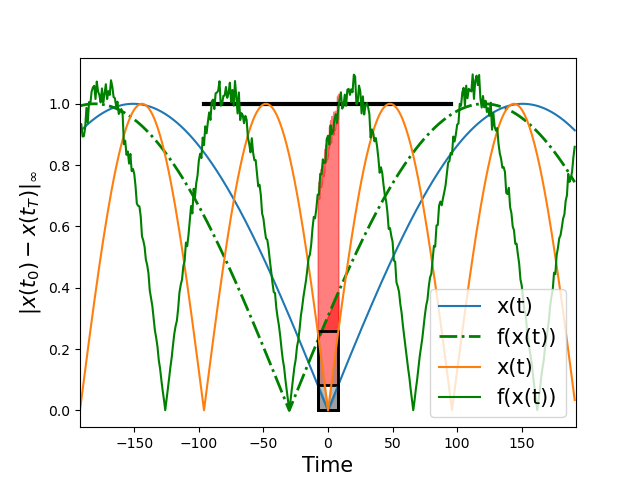

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint

def f(x):
    return np.abs(np.sin (2 * 3.141 * x/(96 * 2))) * (1 + np.random.sample((x).shape) * 0.0)

def f_shifted(x, pred_horiz):
    return f(x-pred_horiz) * (1 + np.random.sample(f(x).shape) * 0.1)

plt.xlim(-96*2, 96*2)  # Adjusted x-axis limits


for input_length in [8]:
    for pred_horiz in [-30]:

        box_x = np.linspace(-input_length, input_length, 100)
        max_value = np.max(f(box_x))

        box_y = np.full_like(box_x, max_value)

        # Plot the rectangle
        plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'k-', linewidth=2)  # Top line
        plt.plot([box_x[0], box_x[-1]], [np.min(f(box_x)), np.min(f(box_x))], 'k-', linewidth=2)  # Bottom line
        plt.plot([box_x[0], box_x[0]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Left line
        plt.plot([box_x[-1], box_x[-1]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Right line

        # Shade the area below the curve within the box
        plt.fill_between(box_x, np.min(f(box_x)), f(box_x), where=(box_y > f(box_x)), color='gray', alpha=0.5)

        x = np.arange(-96*2, 96*2, 1)
    
        copy_box_x = np.array(box_x)
        plt.plot(x, f(x), label="x(t)")


        ###############################

        box_x = np.linspace(-input_length, input_length, 100)
        f_shifted_box_x = f_shifted(box_x, pred_horiz) 
        sprint(f_shifted_box_x.shape)
        
        max_value = np.max(f_shifted_box_x)

        box_y = np.full_like(box_x, max_value)

        # Plot the rectangle
        # plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'k--', linewidth=1)  # Top line
        # plt.plot([box_x[0], box_x[-1]], [np.min(f_shifted_box_x), np.min(f_shifted_box_x)], 'k--', linewidth=1)  # Bottom line
        # plt.plot([box_x[0], box_x[0]], [np.min(f_shifted_box_x), max_value], 'k--', linewidth=1)  # Left line
        # plt.plot([box_x[-1], box_x[-1]], [np.min(f_shifted_box_x), max_value], 'k--', linewidth=1)  # Right line

        # Shade the area below the curve within the box
        plt.fill_between(box_x, , f_shifted_box_x, where= (np.max(f(box_x)) < f_shifted_box_x), color='red', alpha=0.5)

    
        plt.plot(x, f_shifted(x, pred_horiz), label=r"f(x(t))", alpha=1, color="green")

        plt.xlabel("Time", fontsize=15)
        plt.ylabel(r"$|x(t_0) - x(t_T)|_\infty$", fontsize=15)
        plt.legend(loc=4, fontsize=15)
        plt.savefig("csr_with_sine_shift.png")        
        plt.show()


IntSlider(value=8, description='Look back/ahead window', max=20, min=1)

IntSlider(value=-30, description='Prediction Horizon', max=0, min=-50)

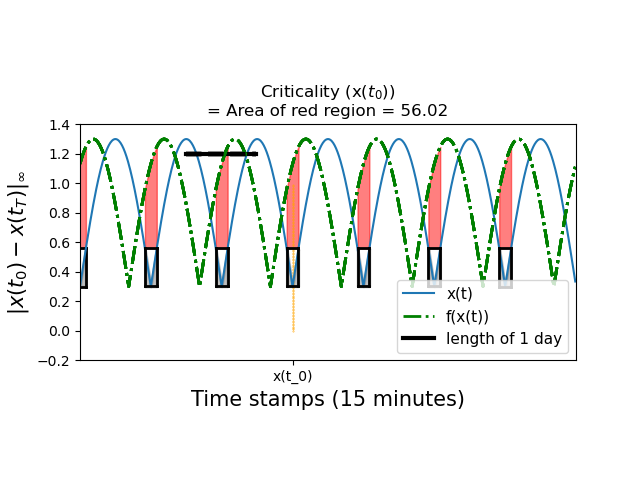

In [108]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from scipy.integrate import quad


def f(x):
    return np.abs(np.sin (2 * 3.141 * x/(96 * 2))) * (1 + np.random.sample((x).shape) * 0.0) + 0.3

def f_shifted(x, pred_horiz):
    return f(x-pred_horiz) * (1 + np.random.sample(f(x).shape) * 0.0) 


import time
# Function to generate data
def generate_data(length):
    # Generate data here
    pass


current_plot = plt.gca() 

def plot_with_slider(input_length, pred_horiz):
    plt.clf()
    plt.xlim(-96*3, 96*4)  # Adjusted x-axis limits
    
    for input_length in [input_length]:
        for pred_horiz in [pred_horiz]:
                        ###############################
            for days in range(-3, 4):
                box_x = np.linspace(-input_length + days * 96 , input_length + days * 96, 100)
                max_value = np.max(f(box_x))

                box_y = np.full_like(box_x, max_value)

                # Plot the rectangle
                plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'k-', linewidth=2)  # Top line
                plt.plot([box_x[0], box_x[-1]], [np.min(f(box_x)), np.min(f(box_x))], 'k-', linewidth=2)  # Bottom line
                plt.plot([box_x[0], box_x[0]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Left line
                plt.plot([box_x[-1], box_x[-1]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Right line

                # Shade the area below the curve within the box
                plt.fill_between(box_x, np.min(f(box_x)), f(box_x), where=(box_y > f(box_x)), color='gray', alpha=0.5, linewidth=2)

                x = np.arange(-96*3, 96*4, 1)

                copy_box_x = np.array(box_x)
                
                if days == -3:
                    plt.plot(x, f(x), label="x(t)")

                
                box_x = np.linspace(-input_length + days * 96, input_length + days * 96, 100)
                f_shifted_box_x = f_shifted(box_x, pred_horiz) 
                # sprint(f_shifted_box_x.shape)

                max_value = np.max(f_shifted_box_x)

                box_y = np.full_like(box_x, max_value)

                # Plot the rectangle
                # plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'k--', linewidth=1)  # Top line
                # plt.plot([box_x[0], box_x[-1]], [np.min(f_shifted_box_x), np.min(f_shifted_box_x)], 'k--', linewidth=1)  # Bottom line
                # plt.plot([box_x[0], box_x[0]], [np.min(f_shifted_box_x), max_value], 'k--', linewidth=1)  # Left line
                # plt.plot([box_x[-1], box_x[-1]], [np.min(f_shifted_box_x), max_value], 'k--', linewidth=1)  # Right line

                # Shade the area below the curve within the box
                max_ = np.max(f(box_x))
                plt.fill_between(box_x, max_, f_shifted_box_x, where= (max_ < f_shifted_box_x), color='red', alpha=0.5)
                a = np.sum( (f_shifted_box_x - max_)[(max_ < f_shifted_box_x)] )

                if days == -3: 
                    plt.plot(x, f_shifted(x, pred_horiz), '-.',label=r"f(x(t))", alpha=1, color="green", linewidth=2)

                    plt.plot(list(range(-96//2*3, -96//2*1)), np.array(list(range(-96//2*3, -96//2*1))) * 0 + 1.2, 
                         color="black", linewidth=3, label="length of 1 day")
                else:
                    plt.plot(x, f_shifted(x, pred_horiz), '-.', alpha=1, color="green", linewidth=2)

                    plt.plot(list(range(-96//2*3, -96//2*1)), np.array(list(range(-96//2*3, -96//2*1))) * 0 + 1.2, 
                         "--",color="black", linewidth=3)
                # plt.text(-48, 48, " 1 day ", fontsize=15,  bbox=dict(facecolor='red', alpha=0.5))
                
            plt.xlabel("Time stamps (15 minutes)", fontsize=15)
            plt.ylabel(r"$|x(t_0) - x(t_T)|_\infty$", fontsize=15)                
            plt.legend(loc=4, fontsize=11)
            plt.ylim(-0.2, 1.4)
            plt.scatter([0] * 100, np.arange(0, 1, 1 / 100), s=0.1, color="orange")
            if a > 0.2: 
                plt.title(r"Criticality (x$(t_0)$)" + "\n= Area of red region = " + str(round(a, 2)) )
            elif a < 0.2:
                plt.title(r"Criticality (x$(t_0)$)" + "\n= Area of red region = " + str(round(a, 2)) +"\nf(x): naive model")
            plt.gca().set_aspect(200)
            
            ax = plt.gca()
            ax.set_xticks([0])
            ax.set_xticklabels(["x(t_0)"])
            plt.show()


def on_value_change(change):
    input_length = input_length_slider.value
    pred_horiz = pred_horiz_slider.value
    plot_with_slider(input_length, pred_horiz)

input_length_slider = widgets.IntSlider(value=8, min=1, max=20, description='Look back/ahead window')
pred_horiz_slider = widgets.IntSlider(value=-30, min=-50, max=0, description='Prediction Horizon')

input_length_slider.observe(on_value_change, 'value')
pred_horiz_slider.observe(on_value_change, 'value')

display(input_length_slider)
display(pred_horiz_slider)

plot_with_slider(input_length_slider.value, pred_horiz_slider.value)


In [98]:
np.arange(-0.2, 1, 1.2 / 100).shape

(100,)